# CD: Visualização

# Introdução

<!--Motivação da aula-->

<!--TOC dos temas da aula (pra ajudar os alunos a se acharem na aula)-->

<!--Texto (enxuto, objetivo) com os objetivos de aprendizagem principais (o que, principalmente, os alunos tem que sair dessa aula sabendo)-->

<!--Ao longo da aula: adicionar mais referências, especialmente sobre onde expandir os conhecimentos sobre cada tema-->

<!--Na mesma ideia das aulas passadas, vamos explicar teoricamente o que é uma visualização (tanto como tabela ou gráfico), e depois falar sobre os "tipos" de visualizações que queremos criar-->

Como apresentado na última aula, estamos agora aprendendo a realizar um "projeto de Ciência de Dados". Nesta aula, veremos o processo de vizualização de um dados.



## Visualização de Dados

<!--explicar o objetivo. brevemente falar sobre tabelas de sumarização (e seus componentes) e gráficos (e seus componentes)-->

<img src="https://d33wubrfki0l68.cloudfront.net/571b056757d68e6df81a3e3853f54d3c76ad6efc/32d37/diagrams/data-science.png" height="200">

Aqui, serei preguiçoso, o texto do Hadley Wickham é muito bom:

> Visualisation is a fundamentally human activity. A good visualisation will show you things that you did not expect, or raise new questions about the data. A good visualisation might also hint that you’re asking the wrong question, or you need to collect different data. Visualisations can surprise you, but don’t scale particularly well because they require a human to interpret them.

Basicamento nosso objetivo aqui é olhar para um data frame e entender quais informações queremos tirar dele e como fazer isso, para depois podermos modelar esses dados.

O caminho é o seguinte:

- Na aula 4, aprendemos as etapas de tidy e transform.
- Nesta aula, aprenderemos a etapa visualize.
- Na aula 6, aprenderemos a etapa model.
- Por fim, na aula 7, juntaremos tudo, aprendendo como fazer um projeto completo. Adicionalmente, aprenderemos como organizar um script para tal.

### Índice
1. Vizualização de estatísticas descritivas de diferentes dados
2. Elementos de um gráfico
3. Como fazer gráficos com matplotlib
4. Recapitulando
5. Extras
6. Outros

## Sumarização com Pandas

Uma maneira de visualizar dados é criar resumos, calcular estatísticas descritivas que contem informações chave sobre os dados, de maneira concisa.

Estes links tem alguns tutoriais interessantes:

- https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
- https://www.geeksforgeeks.org/pandas-groupby-summarising-aggregating-and-grouping-data-in-python/

Vamos começar carregando dados:

In [104]:
import pandas as pd

<!-- salvar o dataframe em assets/materials -->

In [105]:
df = pd.read_csv("https://drive.google.com/uc?id=1u2MEH_DTBMyG3clVKA4Q5FEpntLZNKeE")
df = df.drop(df.columns[0], axis=1)
df['Engine'] = pd.to_numeric(df['Engine'].str.replace(' CC', ''), errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].str.replace(' bhp', ''), errors='coerce')
df = df.drop(df["Kilometers_Driven"].idxmax())
df


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998.0,67.10,5.0,NaN,2.65


### Sumarisando o dataframe como um todo

<!-- variáveis categóricas (sem ordenação) (como Fuel_Type ou Estado Cívil) vs variáveis contínuas (valores na reta real) -->
<!-- variáveis discretas (valores inteiros) com poucos ou muitos valores (como uma pesquisa de satisfação de 1 a 5 ou o Seats do df) -->
<!-- apresentar mais opções de estatísticas / visualizações -->

Existem algumas funções que combinam várias informações sobre todas as variáveis ao mesmo tempo.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 611.4+ KB


In [21]:
df.describe().round(3)

,Year,Kilometers_Driven,Engine,Power,Seats,Price
count,6019.000,6019.000,5983.000,5876.000,5977.000,6019.000
mean,2013.358,58738.380,1621.276,113.253,5.279,9.479
std,3.270,91268.843,601.355,53.875,0.809,11.188
min,1998.000,171.000,72.000,34.200,0.000,0.440
25%,2011.000,34000.000,1198.000,75.000,5.000,3.500
50%,2014.000,53000.000,1493.000,97.700,5.000,5.640
75%,2016.000,73000.000,1984.000,138.100,5.000,9.950
max,2019.000,6500000.000,5998.000,560.000,10.000,160.000


### Sumarisando variáveis categóricas

Para variáveis categóricas sem uma ordem intrínseca, podemos ver a frequência absoluta e relativa de cada categoria.

Exemplo: gênero, estado civil e tipo de produto.

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64


<Axes: xlabel='Fuel_Type'>

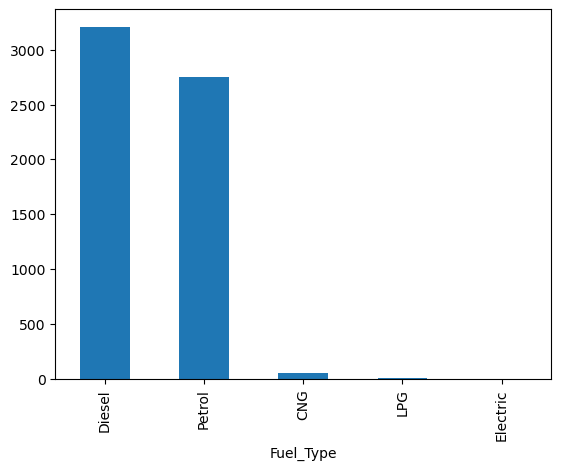

In [61]:
#Frequência abusoluta
counts1 = df['Fuel_Type'].value_counts()

print(counts1)
counts1.plot(kind = "bar")

Owner_Type
First             0.818877
Second            0.160851
Third             0.018777
Fourth & Above    0.001496
Name: proportion, dtype: float64


<Axes: xlabel='Owner_Type'>

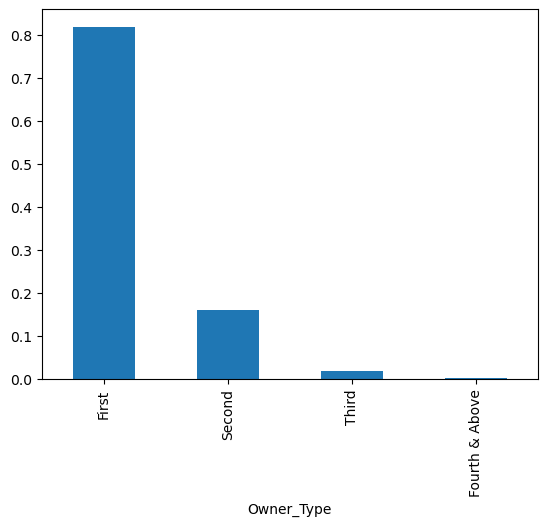

In [107]:
#Frequência relativa
counts2 = df['Owner_Type'].value_counts(normalize = True)

print(counts2)
counts2.plot(kind = "bar")

### Sumarisando variáveis contínuas

Para variáveis que podem assumir qualquer valor dentro da reta real, podemos olhar para a média, mediana, SD.

Exemplo: renda, preço e peso.

<!-- objetivo de estatísticas comuns "quando estarei interessado em olhar pro SD, média vs mediana"  -->

In [23]:
print(df['Price'].mean()) # Também existe .sum(), .min(), etc.

df['Price'].describe()

9.47946835022429


count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

De modo mais geral, mas menos mensurável, podemos olhar para a distribuição da variável como um todo com um histograma, e uma visualização simplificada com boxplots.

Histograma: Gráfico que representa a distribuição de uma variável contínua, dividindo os dados em intervalos (ou "bins") e exibindo a frequência de valores em cada intervalo. É útil para visualizar a forma, dispersão e tendências dos dados, como assimetria e presença de picos.

<!-- histograma, e falar a diferença entre histograma e densidade -->
<!-- histograma com uma distribuição normal (teórica) em cima -->

<Axes: ylabel='Density'>

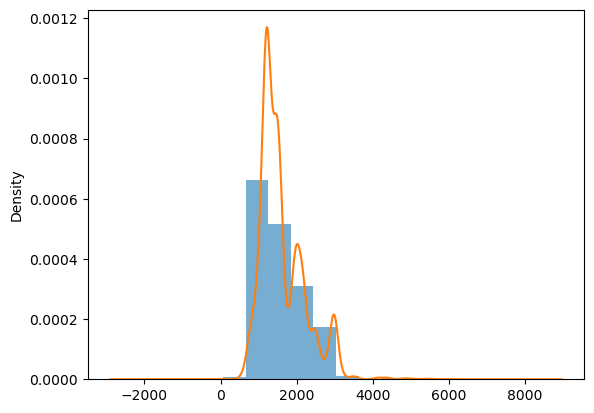

In [27]:
ax = df['Engine'].plot.hist(density=True, bins=10, alpha=0.6, label='Histograma')
df['Engine'].plot.density(ax=ax, label='Densidade')

Boxplot: Gráfico que resume a distribuição de uma variável através de cinco valores-chave: mínimo, primeiro quartil, mediana, terceiro quartil e máximo. Ele é eficaz para identificar outliers, a dispersão dos dados e diferenças entre distribuições de grupos.

<Axes: >

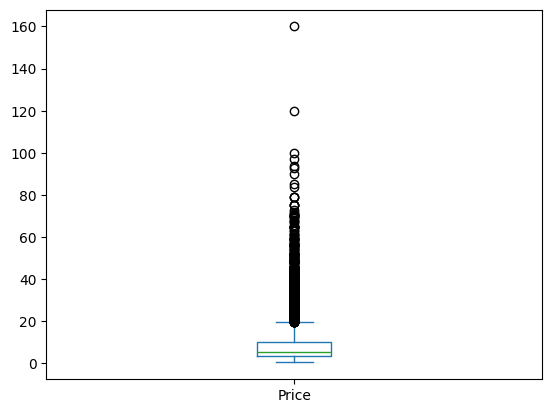

In [19]:
df['Price'].plot.box()

### Sumarisando variáveis discretas

Para variáveis que podem assumir valores inteiros específicos, olhamos para a média, moda e frequência

Exemplos: número de filhos, número de produtos vendidos, índice de satisfação de 1 a 5

<Axes: xlabel='Year'>

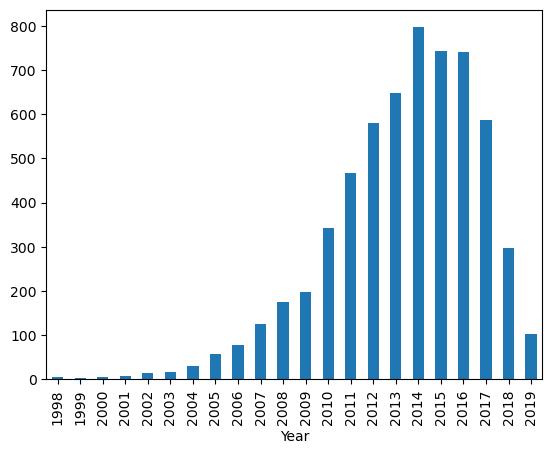

In [42]:
counts = df['Year'].value_counts().sort_index()

counts.plot(kind='bar')

In [108]:
print(df['Year'].mean())
print(df['Year'].mode())

2013.3575938850117
0    2014
Name: Year, dtype: int64


In [69]:
print(df['Seats'].mean())
print(df['Seats'].mode())

5.278735151413753
0    5.0
Name: Seats, dtype: float64


<!-- violinplot -->

### Analisando grupos nos dados

<!-- explicar a "intenção" dessa operação, explicar o que queremos fazer "em portugues" antes de ir pro pandas -->
<!-- falar bem mais, falar das funções de aggregate que não falamos na aula 3 -->
<!-- summarise com operação customizada? sem ser .sum(), etc. Falar de .agg -->
<!-- ver um exemplo de: df['Price'].sum() vs df.sum('Price'), e escolher um método pra ensinar -->

Podemos estar interessado em fazer esses resumos mas utilizando grupos nos dados. Veja [este tutorial](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) para mais informações.


<img src="captura.png" width="500">


In [110]:
#Saber a o preço médio de cada tipo
df.groupby('Transmission')['Price'].mean()

Transmission
Automatic    19.817702
Manual        5.332703
Name: Price, dtype: float64

In [36]:
#Saber o total de cada tipo
df.groupby('Fuel_Type')['Price'].sum()

Fuel_Type
CNG           196.94
Diesel      41154.14
Electric       25.75
LPG            24.87
Petrol      15655.22
Name: Price, dtype: float64

Price    Axes(0.125,0.11;0.775x0.77)
dtype: object

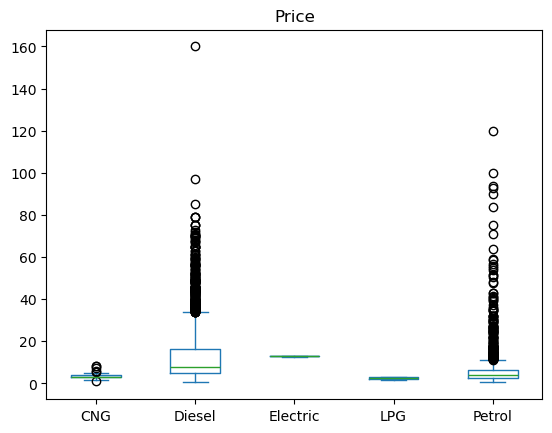

In [112]:
df.plot.box(column = 'Price', by = 'Fuel_Type')

In [38]:
df.groupby('Fuel_Type').agg({'Price': ['sum', 'mean']})

Price           
                sum       mean
Fuel_Type                     
CNG          196.94   3.516786
Diesel     41154.14  12.840605
Electric      25.75  12.875000
LPG           24.87   2.487000
Petrol     15655.22   5.701100

In [35]:
df.groupby('Location').agg({'Price': ['sum', 'mean']})

Price           
                sum       mean
Location                      
Ahmedabad   1894.44   8.457321
Bangalore   4771.65  13.328631
Chennai     3830.29   7.753623
Coimbatore  9589.75  15.078223
Delhi       5378.08   9.707726
Hyderabad   7254.20   9.776550
Jaipur      2399.21   5.809225
Kochi       7277.65  11.179186
Kolkata     3028.75   5.661215
Mumbai      7449.17   9.429329
Pune        4183.73   6.726254

<!--Escolha uma frase remetendo pausa e tire print de alguma arte dela em https://patorjk.com/software/taag/. Exemplo:-->

<hr>


<img src="break5.png" width="500">

<hr>

## Gráficos com o Matplotlib

<!-- cuidado pra não deixar a aula muito expositiva/densa. conteúdos de decoreba, mova para a seção de Extras -->

### Anatomia e Estilo de Programação

<!-- Falar mais sobre os componentes de um gráfico, para setar o contexto para dividir as funções do matplotlib em "caixinhas" -->
<!-- achar relações entre variáveis -->

O Matplotlib exibe seus dados em Figuras (por exemplo, janelas, widgets Jupyter, etc.), cada uma das quais pode conter um ou mais Eixos, uma área onde pontos podem ser especificados em termos de coordenadas x-y (ou theta-r em um gráfico polar, x-y-z em um gráfico 3D, etc.). A maneira mais simples de criar uma Figura com um Eixo é usando pyplot.subplots.

Alguns links úteis:

- https://matplotlib.org/stable/users/explain/quick_start.html.
- https://matplotlib.org/3.8.3/users/index.html.
- https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png.
- https://matplotlib.org/3.8.3/index.html.
- https://matplotlib.org/3.8.3/api/index.html.

<!-- explicar os links -->


### Anatomia de uma figura

<img src="https://matplotlib.org/stable/_images/anatomy.png" width="300">

<!-- 
criar exemplo simples com o que pertence a o que:
- o que é plotado
- a estética dos dados
- a estética da figura

só dps trazer isso pro matplotlib
 -->


### Plots

<!-- Falar os tipos de plots quistos, e citar as funções que os criam. scatterplot, line plot, bar/colplot, histograms/violinplot, boxplot, pieplot, o que mais? -->


- Conteúdo principal do gráfico, ou seja, os dados que queremos visualizar 
- A escolha de gráfico para plotar vai depender do tipo de dado que temos e do que queremos comunica


<img src="grafico1.png" width="500">a

Tipos de gráficos:
- Bar Plot: comparar categorias diferentes, principalmente com dados categóricos ou discretos. Funciona para mostrar a frequência e contagem dos valores
- Scatter Plot: mostrar relação entre duas variáveis contínuas, principalmente para observar padrões, tendências e correlações entre duas variáveis
- Line Plot: observar mudanças ao longo do tempo de séries de temporais, principalmente para análises de tendência e sazonalidades
- Histograma: visualizar a distribuição de uma variável contínua agrupando dados em intervalos e mostra quantos dados caem em cada intervalo
- Boxplot: resumir a distribuição de uma variável e destacar valores atípico, principalmente para comparar a distribuição entre várias categorias
- Pie Plot: mostrar proporções ou porcentagem entre categorias
- Heatmap: visualizar variáveis categóricas ou contínuas em formato de matriz, usando cores para mostrar intensidade ou frequênciacia

### Estéticas

<!-- estética do dado -->
<!-- estéticas são os componentes visuais que tem relação direta com os dados cores, fills, markers, linetypes, etc. -->
<!-- difícil: é nessa seção que deve-se ensinar a fazer plots com dados separados com uma legenda, pra várias estéticas diferentes -->

- elementos visuais diretamente ligados aos dados
- ajudam a distinguir e interpretar diferentes partes do gráfico
- propósito de destacar os dados de forma intuitiva
- cor dos pontos ou barras, formato e tamanho dos marcadores e espessuda  as linhas

<img src="grafico2.png" width="500">cia

### Tema

<!-- estética da figura -->
<!-- temas são os componentes visuais que não tem relação com os dados: títulos, grade, cores de fundo, etc. -->

- apresentação geral do gráfico, 
- tudo que não está diretamente relacionado aos dados, mas que torna o gráfico mais legível e organizado
- título, rótulos dos eixos, fundo, grid, legenda



<img src="grafico3.png" width="500">da

### O estilo da programação

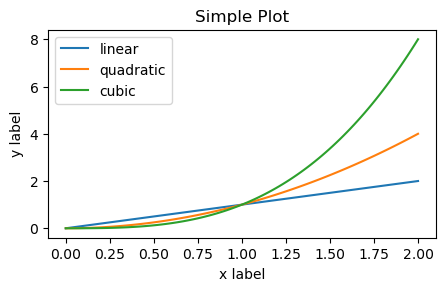

In [119]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

### Plots Combinados

<!-- ensinar. talvez tbm tenha varios metodos, escolhe um -->

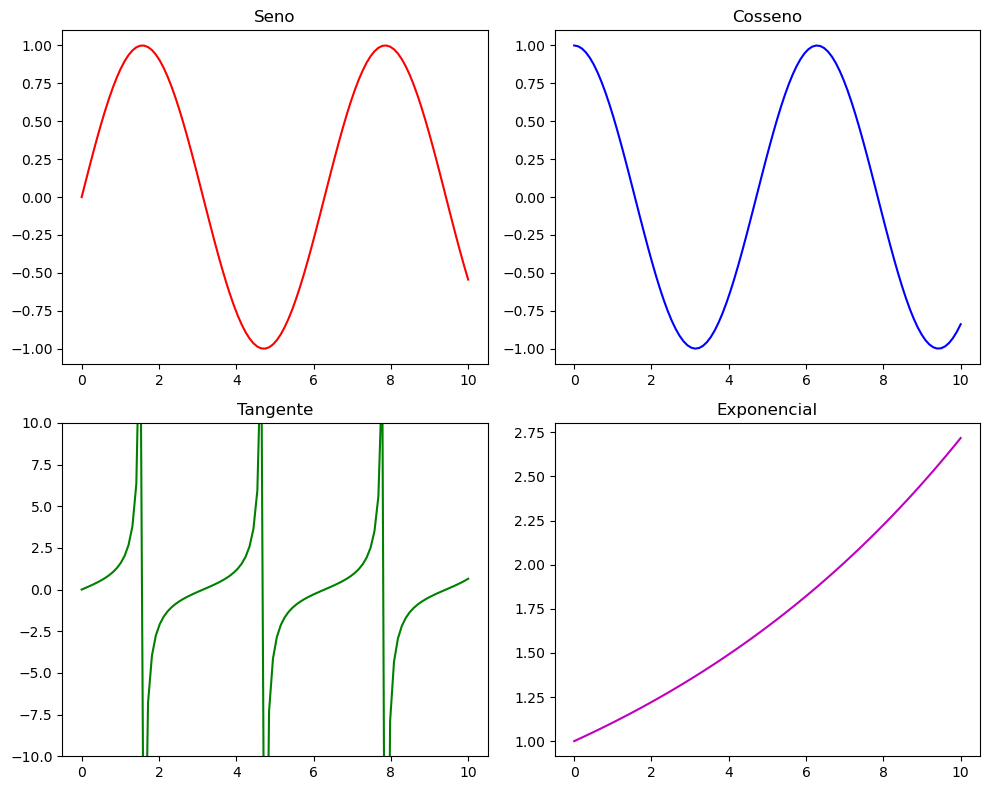

In [74]:
# Gerando dados fictícios para os gráficos
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x / 10)

# Criando uma matriz de 2x2 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Primeiro gráfico
axes[0, 0].plot(x, y1, 'r')
axes[0, 0].set_title('Seno')

# Segundo gráfico
axes[0, 1].plot(x, y2, 'b')
axes[0, 1].set_title('Cosseno')

# Terceiro gráfico
axes[1, 0].plot(x, y3, 'g')
axes[1, 0].set_ylim(-10, 10)  # Limitando o eixo y para evitar valores muito grandes
axes[1, 0].set_title('Tangente')

# Quarto gráfico
axes[1, 1].plot(x, y4, 'm')
axes[1, 1].set_title('Exponencial')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

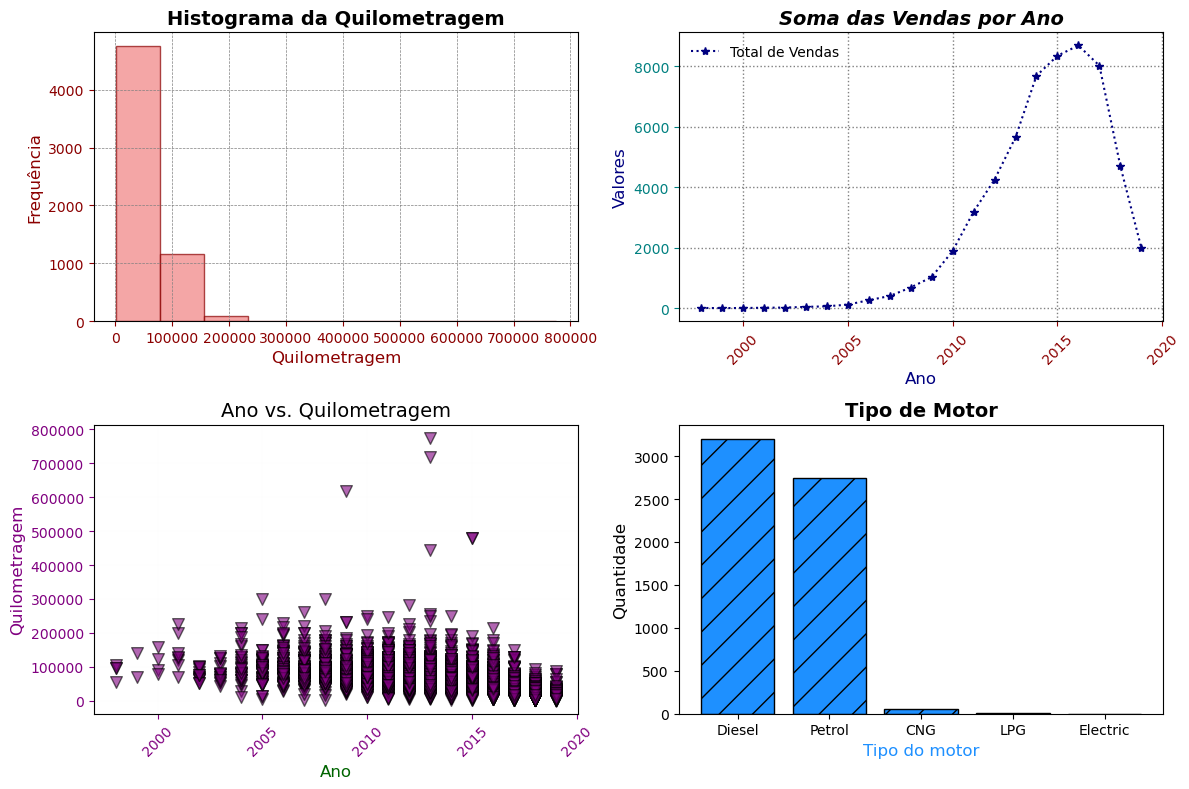

In [120]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histograma da quilometragem
axs[0, 0].hist(df['Kilometers_Driven'], bins=10, color='lightcoral', edgecolor='darkred', alpha=0.7)
axs[0, 0].set_title('Histograma da Quilometragem', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Quilometragem', fontsize=12, color='darkred')
axs[0, 0].set_ylabel('Frequência', fontsize=12, color='darkred')
axs[0, 0].tick_params(axis='both', colors='darkred')
axs[0, 0].grid(color='grey', linestyle='--', linewidth=0.5, alpha=1)

# Gráfico de linhas com soma de vendas
axs[0, 1].plot(
    df.groupby("Year")["Price"].sum().index,
    df.groupby("Year")["Price"].sum().values,
    marker='*', linestyle=':', color='navy', markersize=6, label='Total de Vendas'
)
axs[0, 1].set_title('Soma das Vendas por Ano', fontsize=14, fontweight='bold', fontstyle='italic')
axs[0, 1].set_xlabel('Ano', fontsize=12, color='navy')
axs[0, 1].set_ylabel('Valores', fontsize=12, color='navy')
axs[0, 1].legend(loc='upper left', frameon=False)
axs[0, 1].tick_params(axis='x', colors='darkred', rotation=45)
axs[0, 1].tick_params(axis='y', colors='teal')
axs[0, 1].grid(color='grey', linestyle=':', linewidth=1, alpha=1)

# Scatter plot de Ano vs. Quilometragem 
axs[1, 0].scatter(df['Year'], df['Kilometers_Driven'], color='purple', edgecolor='black', s=70, alpha=0.6, marker='v')
axs[1, 0].set_title('Ano vs. Quilometragem', fontsize=14)
axs[1, 0].set_xlabel('Ano', fontsize=12, color='darkgreen')
axs[1, 0].set_ylabel('Quilometragem', fontsize=12, color='purple')
axs[1, 0].tick_params(axis='x', colors='purple', rotation=45)
axs[1, 0].tick_params(axis='y', colors='purple')
axs[1, 0].grid(color='lavender', linestyle=':', linewidth=0.1, alpha=0.5)

# Gráfico de barras da quantidade de tipo de motor
axs[1, 1].bar(df['Fuel_Type'].value_counts().index, df['Fuel_Type'].value_counts().values, color='dodgerblue', edgecolor='black', hatch='/')
axs[1, 1].set_title('Tipo de Motor', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Tipo do motor', fontsize=12, color='dodgerblue')
axs[1, 1].set_ylabel('Quantidade', fontsize=12)

# Ajuste do layout
plt.tight_layout()
plt.show()

## Extras

<!--colocar as partes muito decorebas aqui-->

Principais paramêtros:

- color: cor
- linewidth: espessura da linha
- width: largura da barra
- linestyle: tipo de linha
- marker: símbolo nos pontos
- markersize: tamanho do símbolo
- label: legenda da série
- s: tamanho de cada ponto
- alpha: controle de transparência
- edgecolor: cor da borda
- hatch: preencimento da barra
- bins: número de intervalos para os dados
- autopct: formato para exibir os valores percentuais
- strangle: ângulo de rocação inicial do gráfcio
- explode: destaca fatias específicas
- cmap: mapa de cores

1. Tipos de Linhas (linestyle)

- '-': Linha contínua (padrão).
- '--': Linha tracejada.
- '-.': Linha traço-ponto.
- ':': Linha pontilhada.
- '' ou 'None': Sem linha (exibe apenas os marcadores).

2. Cores (color)

- Nomes de cores: 'blue', 'red', 'green', 'purple', 'orange', etc.
- Códigos Hexadecimais: '#1f77b4', '#ff7f0e', etc.
- Mapas de Cores (Colormaps): Paletas usadas para gradientes, como 'viridis', 'plasma', 'coolwarm', etc.

3. Marcadores (marker)

- 'o': Círculo
- 's': Quadrado
- '^': Triângulo para cima
- 'v': Triângulo para baixo
- 'D': Losango
- '*': Estrela
- '+': Cruz
- 'x': X

### Outros

Biblioteca seaborn para criar gráficos mais complexos de maneira mais fácil: https://seaborn.pydata.org/

Biblioteca plotline para criar gráfico dinâmica e interativos: https://plotnine.org/



<!-- falar que existem, e suas diferenças com o matplot -->
<!-- seaborn pq é famoso, e plotnine que é a copia do ggplot pro python -->

In [13]:
# Criar uma figura com uma grade de 2 linhas e 3 colunas
fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # figsize ajusta o tamanho total da figura

# 1. Gráfico de Barras
categorias = ['A', 'B', 'C', 'D']
vendas = [50, 30, 20, 40]
axs[0, 0].bar(categorias, vendas, color='skyblue', edgecolor='black')

# 2. Gráfico de Dispersão
idades1 = [20, 25, 30, 35, 40]
pesos1 = [65, 70, 75, 80, 85]
idades2 = [22, 27, 32, 37, 42]
pesos2 = [68, 73, 78, 83, 88]
axs[0, 1].scatter(idades1, pesos1, color='purple', edgecolor='black', marker='o', label="Grupo 1")
axs[0, 1].scatter(idades2, pesos2, color='purple', edgecolor='black', marker='o', label="Grupo 2")

# 3. Gráfico de Linhas
dias = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
temperaturas1 = [18, 20, 22, 21, 19, 17, 18]
temperaturas2 = [19, 21, 23, 22, 20, 18, 19]
axs[0, 2].plot(dias, temperaturas1, marker='o', color='orange', linestyle='-', label="Série 1")
axs[0, 2].plot(dias, temperaturas2, marker='o', color='orange', linestyle='-', label="Série 2")

# 4. Histograma
idades_hist = [22, 22, 23, 24, 25, 25, 26, 27, 28, 28, 29, 30, 30, 31, 32, 32, 33, 34]
axs[1, 0].hist(idades_hist, bins=5, color='lightgreen', edgecolor='black')

# 5. Gráfico de Pizza
regioes = ['A', 'B', 'C', 'D']
vendas_pizza = [300, 500, 200, 400]
axs[1, 1].pie(vendas_pizza, labels=regioes, autopct='%1.1f%%', startangle=140, 
              colors=['#ff9999','#ff9999','#ff9999','#ff9999'])

# 6. Heatmap (Matriz de Correlação)
dados = np.array([[1, 0.8, 0.3], 
                  [0.8, 1, 0.5], 
                  [0.3, 0.5, 1]])
im = axs[1, 2].imshow(dados, cmap='viridis', aspect='auto')

# Ajuste de layout
plt.tight_layout()

# Salvar a figura sem mostrar na tela
#plt.savefig("grafico1.png", dpi=300)
plt.show()
#plt.close()

In [ ]:
#Gráfico 2
# Criar uma figura com uma grade de 2 linhas e 3 colunas
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# 1. Gráfico de Barras com cores diferentes para cada barra
categorias = ['A', 'B', 'C', 'D']
vendas = [50, 30, 20, 40]
cores = ['skyblue', 'salmon', 'lightgreen', 'gold']
axs[0, 0].bar(categorias, vendas, color=cores, edgecolor='black')

# 2. Gráfico de Dispersão com dois grupos de dados, cores e formatos diferentes
idades1 = [20, 25, 30, 35, 40]
pesos1 = [65, 70, 75, 80, 85]
idades2 = [22, 27, 32, 37, 42]
pesos2 = [68, 73, 78, 83, 88]
axs[0, 1].scatter(idades1, pesos1, color='purple', edgecolor='black', marker='o', label="Grupo 1")
axs[0, 1].scatter(idades2, pesos2, color='blue', edgecolor='black', marker='s', label="Grupo 2")

# 3. Gráfico de Linhas com duas séries temporais e estilos de linha diferentes
dias = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
temperaturas1 = [18, 20, 22, 21, 19, 17, 18]
temperaturas2 = [19, 21, 23, 22, 20, 18, 19]
axs[0, 2].plot(dias, temperaturas1, marker='o', color='orange', linestyle='-', label="Série 1")
axs[0, 2].plot(dias, temperaturas2, marker='s', color='green', linestyle='--', label="Série 2")


# 4. Histograma com diferentes estilos de borda
idades_hist = [22, 22, 23, 24, 25, 25, 26, 27, 28, 28, 29, 30, 30, 31, 32, 32, 33, 34]
axs[1, 0].hist(idades_hist, bins=5, color='lightgreen', edgecolor='darkgreen', hatch='//')


# 5. Gráfico de Pizza com diferentes ângulos de início e explosão de fatia
regioes = ['A', 'B', 'C', 'D']
vendas_pizza = [300, 500, 200, 400]
explode = (0, 0.1, 0, 0)  # Explodindo a segunda fatia
axs[1, 1].pie(vendas_pizza, labels=regioes, autopct='%1.1f%%', startangle=140, explode=explode,
              colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])


# 6. Heatmap (Matriz de Correlação) com rótulos e barra de cor ajustada
dados = np.array([[1, 0.8, 0.3], 
                  [0.8, 1, 0.5], 
                  [0.3, 0.5, 1]])
im = axs[1, 2].imshow(dados, cmap='coolwarm', aspect='auto')
fig.colorbar(im, ax=axs[1, 2], fraction=0.046, pad=0.04)

# Ajuste de layout
# Salvar a figura sem mostrar na tela
#plt.savefig("grafico2.png", dpi=300)
plt.show()
#plt.close()

In [103]:
#Gráfico 3
# Criar uma figura com uma grade de 2 linhas e 3 colunas
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 1. Gráfico de Barras com cores diferentes para cada barra
categorias = ['A', 'B', 'C', 'D']
vendas = [50, 30, 20, 40]
cores = ['skyblue', 'salmon', 'lightgreen', 'gold']
axs[0, 0].bar(categorias, vendas, color=cores, edgecolor='black')
axs[0, 0].set_title("Vendas por Categoria")
axs[0, 0].set_xlabel("Categorias")
axs[0, 0].set_ylabel("Vendas")

# 2. Gráfico de Dispersão com dois grupos de dados, cores e formatos diferentes
idades1 = [20, 25, 30, 35, 40]
pesos1 = [65, 70, 75, 80, 85]
idades2 = [22, 27, 32, 37, 42]
pesos2 = [68, 73, 78, 83, 88]
axs[0, 1].scatter(idades1, pesos1, color='purple', edgecolor='black', marker='o', label="Homens")
axs[0, 1].scatter(idades2, pesos2, color='blue', edgecolor='black', marker='s', label="Mulheres")
axs[0, 1].set_title("Idade vs Peso")
axs[0, 1].set_xlabel("Idade")
axs[0, 1].set_ylabel("Peso (kg)")
axs[0, 1].legend()

# 3. Gráfico de Linhas com duas séries temporais e estilos de linha diferentes
dias = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
temperaturas1 = [18, 20, 22, 21, 19, 17, 18]
temperaturas2 = [19, 21, 23, 22, 20, 18, 19]
axs[0, 2].plot(dias, temperaturas1, marker='o', color='orange', linestyle='-', label="Série 1")
axs[0, 2].plot(dias, temperaturas2, marker='s', color='green', linestyle='--', label="Série 2")
axs[0, 2].set_title("Temperatura Semanal")
axs[0, 2].set_xlabel("Dias")
axs[0, 2].set_ylabel("Temperatura (°C)")
axs[0, 2].legend()

# 4. Histograma com diferentes estilos de borda
idades_hist = [22, 22, 23, 24, 25, 25, 26, 27, 28, 28, 29, 30, 30, 31, 32, 32, 33, 34]
axs[1, 0].hist(idades_hist, bins=5, color='lightgreen', edgecolor='darkgreen', hatch='//')
axs[1, 0].set_title("Distribuição de Idades")
axs[1, 0].set_xlabel("Idade")
axs[1, 0].set_ylabel("Frequência")

# 5. Gráfico de Pizza com diferentes ângulos de início e explosão de fatia
regioes = ['A', 'B', 'C', 'D']
vendas_pizza = [300, 500, 200, 400]
explode = (0, 0.1, 0, 0)  # Explodindo a segunda fatia
axs[1, 1].pie(vendas_pizza, labels=regioes, autopct='%1.1f%%', startangle=140, explode=explode,
              colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axs[1, 1].set_title("Vendas por Região")

# 6. Heatmap (Matriz de Correlação) com rótulos e barra de cor ajustada
dados = np.array([[1, 0.8, 0.3], 
                  [0.8, 1, 0.5], 
                  [0.3, 0.5, 1]])
im = axs[1, 2].imshow(dados, cmap='coolwarm', aspect='auto')
axs[1, 2].set_title("Heatmap de Correlação")
axs[1, 2].set_xticks(range(3))
axs[1, 2].set_yticks(range(3))
axs[1, 2].set_xticklabels(['Var1', 'Var2', 'Var3'])
axs[1, 2].set_yticklabels(['Var1', 'Var2', 'Var3'])
fig.colorbar(im, ax=axs[1, 2], fraction=0.046, pad=0.04)

# Ajuste de layout
# Salvar a figura sem mostrar na tela
#plt.savefig("grafico3.png", dpi=300)
plt.show()
#plt.close()